In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('NAS.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4248,2020-10-12,0.7090,0.7100,0.6500,0.6768,0.6768,48320475.0
4249,2020-10-13,0.6768,0.6768,0.6000,0.6006,0.6006,47786200.0
4250,2020-10-14,0.6010,0.6400,0.5962,0.6260,0.6260,37534949.0
4251,2020-10-15,0.6260,0.6260,0.5850,0.6050,0.6050,26737615.0
4252,2020-10-16,0.6050,0.6200,0.6010,0.6106,0.6106,15754218.0


In [3]:
#Put your desired date here
inputdate = '2010-01-04'
#Put your desired amount of prediction days for the algorithm if you wish for it to predict x amount of days
prediction_days = 25
df.loc[df['Date'] == inputdate]

,Date,Open,High,Low,Close,Adj Close,Volume
1543,2010-01-04,65.418098,67.417801,65.418098,66.560799,66.560799,467552.0


In [4]:
df = df.dropna()

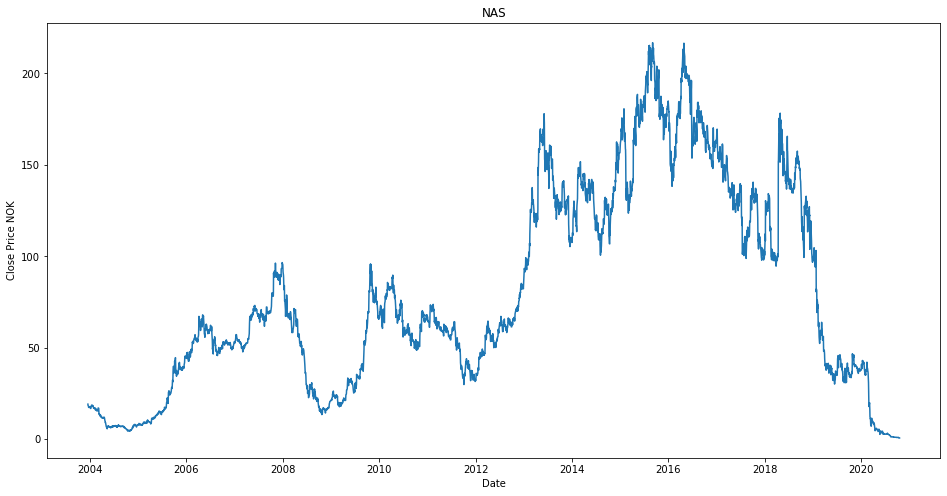

In [5]:
plt.figure(figsize=(16,8))
plt.title('NAS')
plt.xlabel('Date')
plt.ylabel('Close Price NOK')
plt.plot(df['Date'],df['Close'])
#plt.plot(df['Close'])
plt.show()

In [6]:
#Removing all columns and focusing on the close price
#Here we are using copy because we are making a full new copy
df = df[['Date','Close']].copy()

#Creating a dataframe with all the dates up to the desired date
inputdf = df[['Date','Close']].copy()
inputdf = inputdf.loc[df['Date'] <= inputdate]

#Creating array for days the algorithm is going to predict
inputdates = inputdf['Date']
inputdates = np.array([[(i - inputdates[0]).days] for i in inputdates])
inputdates = inputdates[-prediction_days:]

In [7]:
#Here we are creating a variable for the amount of days into the future
#The purpose of this is to train the algorithm 
future_days = 25
#Here we are creating a new column for the target predictions shifted 'x' days up 
#df['Close'] = df[['Close']].shift(-future_days)

In [8]:
#Here we are creating the feature data set (X) and converting it into a numpy array 
#Training input X
X = df['Date']
X = [[(i - X[0]).days] for i in X]
X = np.array(X)
print(X)

[[   0]
 [   1]
 [   4]
 ...
 [6145]
 [6146]
 [6147]]


In [9]:
#Here we are creating the target data set (y) and converting it into a numpy array
#Training output y
y = np.array(df['Close'])
print(y)

[19.139799 18.454201 18.0543   ...  0.626     0.605     0.6106  ]


In [10]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.70)

In [11]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [12]:
tree_prediction = tree.predict(inputdates)
print(tree_prediction)

[75.702202 75.416496 75.416496 77.130501 77.130501 77.130501 77.416199
 77.701897 77.701897 77.701897 77.701897 73.988197 73.988197 73.988197
 73.988197 73.988197 73.416801 73.416801 67.417801 67.417801 67.417801
 67.417801 67.417801 66.560799 66.560799]


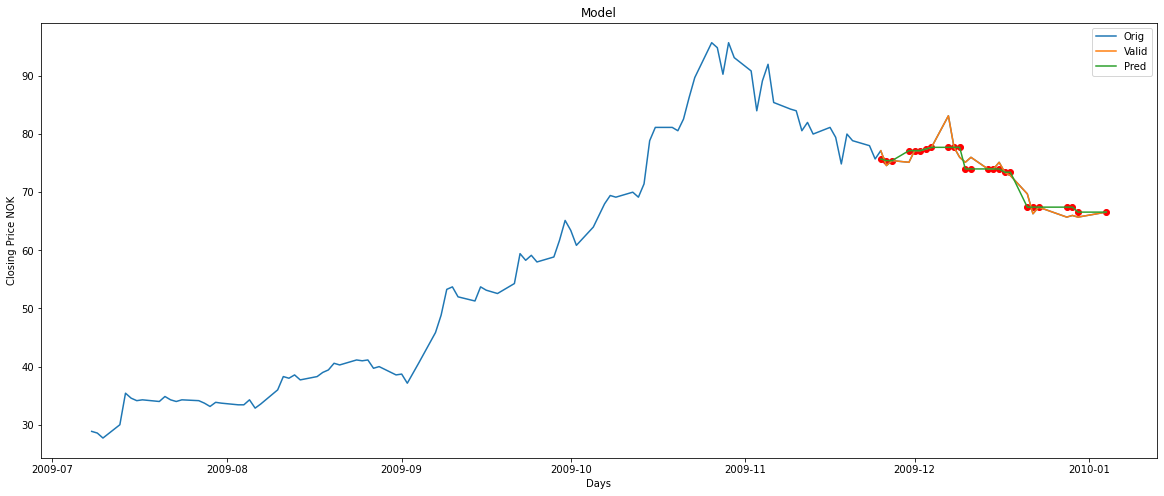

In [13]:
predictions = tree_prediction
#Creating a graph for the valid closing prices compared to the algorithms prediction prices
valid = inputdf.tail(prediction_days).copy()
valid['Actual Predictions'] = predictions
plt.figure(figsize=(20,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Closing Price NOK')
#Here we are plotting each date the algorithm has predicted the price
plt.scatter(valid['Date'],valid['Actual Predictions'], color = 'red')
#Here we are creating the graph and set it to keep the size close to the prices
plt.plot(inputdf['Date'][-(prediction_days+100):],inputdf['Close'][-(prediction_days+100):])
plt.plot(valid['Date'],valid[['Close','Actual Predictions']])
plt.legend(['Orig','Valid','Pred'])
plt.show()

In [14]:
predictedPrice = valid['Actual Predictions'].iloc[-1]
actualPrice = inputdf['Close'].iloc[-1]

print("The predicted price for the date : "+inputdate+" = "+predictedPrice.astype(str))
print("The actual price on this date was : "+actualPrice.astype(str))

predictionScore = 100-round(((abs(predictedPrice - actualPrice)/actualPrice)*100), 2)
print("The prediction score for this date was : "+str(predictionScore)+"%")

trainingScore = round(tree.score(x_test,y_test)*100,2)
print("Here is the training score for the algorithm "+str(trainingScore)+"%")

The predicted price for the date : 2010-01-04 = 66.560799
The actual price on this date was : 66.560799
The prediction score for this date was : 100.0%
Here is the training score for the algorithm 99.6%
